## Webscraping 

Using the <code> BeautifulSoup </code> to scrape data that is available in a table and storing the data into a <code>Pandas</code> dataframe and creating simple visualization using <code>Seaborn</code>

## Importing all necessary libraries

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns

## Scraping data using BeautifulSoup

In [ ]:
url = 'https://www.worldometers.info/world-population/'

In [ ]:
data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(data, 'html5lib')

In [ ]:
tables = soup.find_all('table')

In [ ]:
tables

In [ ]:
for index , table in enumerate(tables):
    if ('popbycountry' in str(table)):
        table_index = index
print(table_index)

In [ ]:
print(tables[table_index].prettify())

## Storing the scraped data from the website into a <code>pandas</code> dataframe

In [ ]:
population_data = pd.DataFrame(columns = ['Rank', 'Country', 'Population', 'Density', 'Fertility_Rate'])

for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    rank = col[0].text
    country = col[1].text
    population = col[2].text
    density = col[5].text
    fertility = col[8].text
    
    population_data = population_data.append({"Rank": rank, "Country": country, 'Population': population, 'Density': density, 'Fertility_Rate': fertility}, ignore_index = True)

In [ ]:
population_data

In [ ]:
population_data.dtypes

## Cleaning data stored in the dataframe

In [184]:
population_data["Population"] = population_data['Population'].replace(',|\$',"")
population_data.dropna(inplace=True)

population_data = population_data[population_data['Population'] != ""]
population_data.head()

,Rank,Country,Population,Density,Fertility_Rate
0,1,China,1439323776,153,1.6900
1,2,India,1380004385,464,2.2402
2,3,United States,331002651,36,1.7764
3,4,Indonesia,273523615,151,2.3195
4,5,Pakistan,220892340,287,3.5500


In [ ]:
population_data["Density"] = population_data['Density'].replace(',|\$',"")
population_data.dropna(inplace=True)

population_data = population_data[population_data['Density'] != ""]

In [ ]:
population_data["Fertility_Rate"] = population_data['Fertility_Rate'].replace(',|\$',"")
population_data["Fertility_Rate"] = population_data['Fertility_Rate'].replace('N.A.',"NaN")
population_data["Fertility_Rate"] = population_data['Fertility_Rate'].replace('NaN',"0")
population_data.dropna(inplace=True)
population_data = population_data[population_data['Fertility_Rate'] != ""]

In [ ]:
population_data['Rank'] = pd.to_numeric(population_data['Rank'])
population_data['Population'] = pd.to_numeric(population_data['Population'])
population_data['Density'] = pd.to_numeric(population_data['Density'])
population_data['Fertility_Rate'] = pd.to_numeric(population_data['Fertility_Rate'])

## Using visualization techniques of seaborn to visualize data to create simple barplots

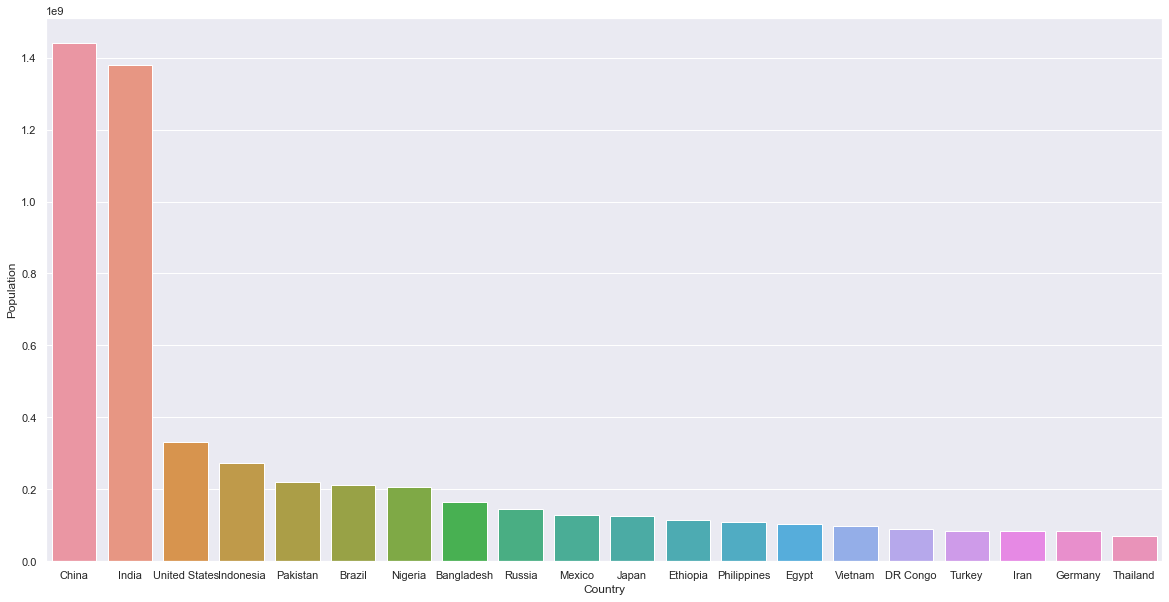

In [179]:
sns.set(rc = {'figure.figsize' : (20,10)})
ax1 = sns.barplot(x='Country', y='Population', data=population_data.head(20))

In [180]:
population_data

,Rank,Country,Population,Density,Fertility_Rate
0,1,China,1439323776,153,1.6900
1,2,India,1380004385,464,2.2402
2,3,United States,331002651,36,1.7764
3,4,Indonesia,273523615,151,2.3195
4,5,Pakistan,220892340,287,3.5500
...,...,...,...,...,...
230,231,Montserrat,4992,50,0.0000
231,232,Falkland Islands,3480,0,0.0000
232,233,Niue,1626,6,0.0000
233,234,Tokelau,1357,136,0.0000


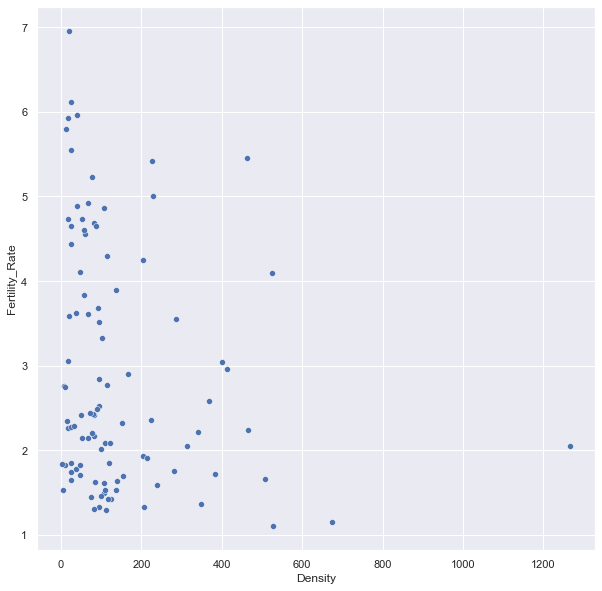

In [181]:
sns.set(rc = {'figure.figsize' : (10,10)})
ax2 = sns.scatterplot(x='Density', y='Fertility_Rate', data=population_data.head(100))

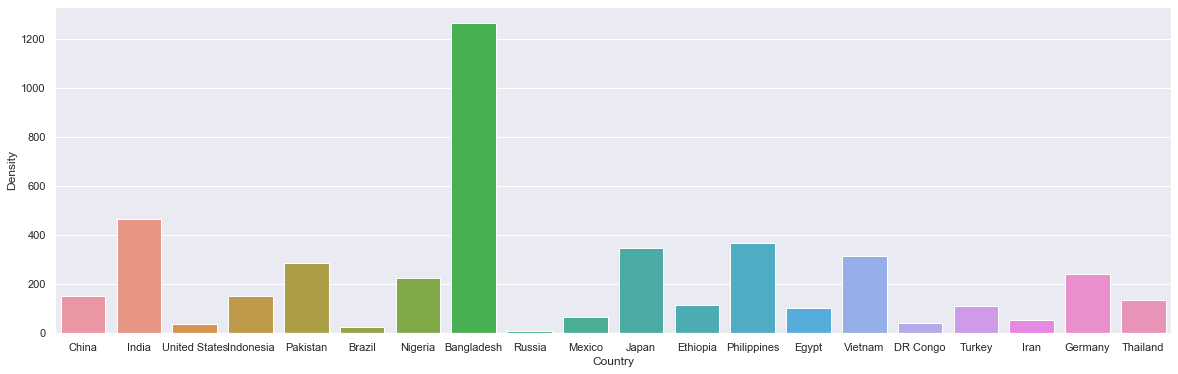

In [182]:
sns.set(rc = {'figure.figsize' : (20,6)})
ax1 = sns.barplot(x='Country', y='Density', data=population_data.head(20))

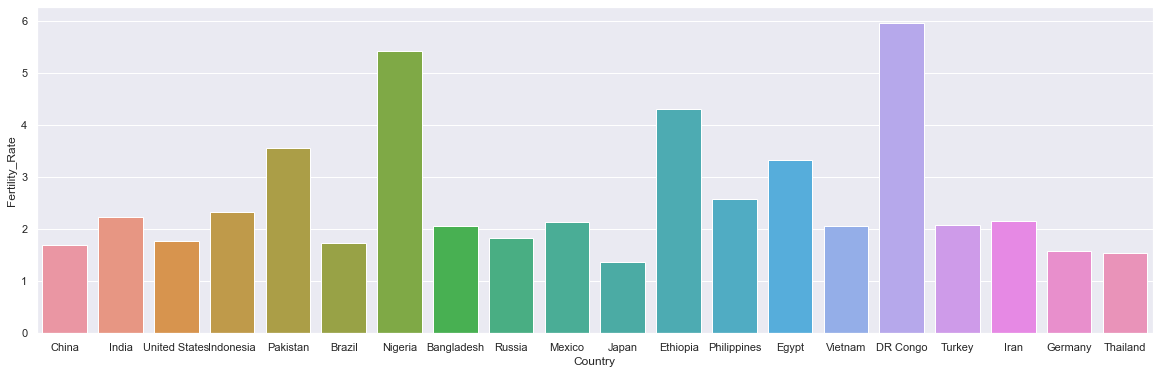

In [183]:
sns.set(rc = {'figure.figsize' : (20,6)})
ax2 = sns.barplot(x='Country', y='Fertility_Rate', data=population_data.head(20))